# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

# Function for feature building and extraction on natural language data

In [2]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
#     print("movie_data is:", type(movie_data))
#     print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
#     print("the data types for each of the columns in movie_data:")
#     print(movie_data.dtypes, "\n")
#     print("the first 10 rows in movie_data:")
#     print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape) 

    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    
    # CountVectorizer, modelled on HashingVectorizer above
    from sklearn.feature_extraction.text import CountVectorizer
    if (not test): # fit_transform()
        cv = CountVectorizer(ngram_range=(1, 2))
        X_cv = cv.fit_transform(movie_data.review)
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[2].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    
    #TfidfTransformer for CountVectorizer, modelled on TfidfTransformer for HashingVectorizer above    
    if (not test):
        transformer_cv = TfidfTransformer(sublinear_tf=True)
        X_tfidf = transformer_cv.fit_transform(X_cv)
        fitted_transformations.append(transformer_cv)
    else:
        X_tfidf = fitted_transformations[3].transform(X_cv) 

        
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[4].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [3]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/meeraramesh/Desktop/School/git/ml/final_assignment_1/moviereviews_train.tsv', my_random_seed=13)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Shape of CountVectorizer X:
(25000, 1513832)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5          89           5
6         112           9
7         132           9
8         163           7
9          43           5
Size of combined bag of words and new quantitative variables matrix:
(25000, 1513834)
(25000, 1513834)
Shape of X_train and X_test:
(20000, 1513834)
(5000, 1513834)
Shape of y_train and y_test:
(20000,)
(5000,)
Shape of X_raw_train and X_raw_test:
(20000, 5)
(5000, 5)
SUCCESS!
Number of fits stored in `fitted_transformations` list: 
5


# Fit (and tune) Various Models

### MODEL: Ridge Regression Classifier

In [4]:
from sklearn import linear_model

rdg_original = linear_model.RidgeClassifier()
rdg_original.fit(X_train, y_train)

rdg_alpha1 = linear_model.RidgeClassifier(alpha=100000)
rdg_alpha1.fit(X_train, y_train)

rdg_alpha2 = linear_model.RidgeClassifier(alpha=400000)
rdg_alpha2.fit(X_train, y_train)

rdg_alpha3 = linear_model.RidgeClassifier(alpha=500000)
rdg_alpha3.fit(X_train, y_train)

rdg_alpha4 = linear_model.RidgeClassifier(alpha=1000000)
rdg_alpha4.fit(X_train, y_train)

rdg_performance_train_original = BinaryClassificationPerformance(rdg_original.predict(X_train), y_train, 'rdg_original_train')
rdg_performance_train_original.compute_measures()
print("original") 
print(rdg_performance_train_original.performance_measures)

rdg_performance_train_alpha1 = BinaryClassificationPerformance(rdg_alpha1.predict(X_train), y_train, 'rdg_alpha1_train')
rdg_performance_train_alpha1.compute_measures()
print("alpha1")
print(rdg_performance_train_alpha1.performance_measures)

rdg_performance_train_alpha2 = BinaryClassificationPerformance(rdg_alpha2.predict(X_train), y_train, 'rdg_alpha2_train')
rdg_performance_train_alpha2.compute_measures()
print("alpha2")
print(rdg_performance_train_alpha2.performance_measures)

rdg_performance_train_alpha3 = BinaryClassificationPerformance(rdg_alpha3.predict(X_train), y_train, 'rdg_alpha3_train')
rdg_performance_train_alpha3.compute_measures()
print("alpha3")
print(rdg_performance_train_alpha3.performance_measures)

rdg_performance_train_alpha4 = BinaryClassificationPerformance(rdg_alpha4.predict(X_train), y_train, 'rdg_alpha4_train')
rdg_performance_train_alpha4.compute_measures()
print("alpha4")
print(rdg_performance_train_alpha4.performance_measures)

# # graphs for alpha changes to ridge class on training set data
# graphs = [rdg_performance_train_original, rdg_performance_train_alpha1, rdg_performance_train_alpha2, rdg_performance_train_alpha3, rdg_performance_train_alpha4]
# # graphs = [rdg_performance_train_alpha3]

# for graph in graphs:
#     plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
#     plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: training set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

original
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_original_train'}
alpha1
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha1_train'}
alpha2
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha2_train'}
alpha3
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha3_train'}
alpha4
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha4_train'}


---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: Ridge Regression Classifier

original, alpha = 1
{'Pos': 2498, 'Neg': 2502, 'TP': 2298, 'TN': 2224, 'FP': 278, 'FN': 200, 'Accuracy': 0.9044, 'Precision': 0.8920807453416149, 'Recall': 0.9199359487590072, 'desc': 'rdg_original_test'}
alpha1, alpha = 100000
{'Pos': 2498, 'Neg': 2502, 'TP': 2291, 'TN': 2234, 'FP': 268, 'FN': 207, 'Accuracy': 0.905, 'Precision': 0.8952715904650254, 'Recall': 0.9171337069655725, 'desc': 'rdg_alpha1_test'}
alpha2, alpha = 400000
{'Pos': 2498, 'Neg': 2502, 'TP': 2276, 'TN': 2246, 'FP': 256, 'FN': 222, 'Accuracy': 0.9044, 'Precision': 0.8988941548183255, 'Recall': 0.911128903122498, 'desc': 'rdg_alpha2_test'}
alpha3, alpha = 500000
{'Pos': 2498, 'Neg': 2502, 'TP': 2273, 'TN': 2245, 'FP': 257, 'FN': 225, 'Accuracy': 0.9036, 'Precision': 0.8984189723320158, 'Recall': 0.9099279423538831, 'desc': 'rdg_alpha3_test'}
alpha4, alpha = 1000000
{'Pos': 2498, 'Neg': 2502, 'TP': 2261, 'TN': 2253, 'FP': 249, 'FN': 237, 'Accuracy': 0.9028, 'Precision': 0.900796812749004, 'Recall': 0.9051240992794235, 

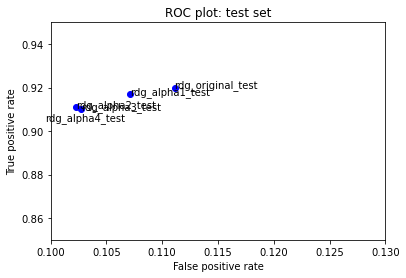

In [5]:
rdg_performance_test_original = BinaryClassificationPerformance(rdg_original.predict(X_test), y_test, 'rdg_original_test')
rdg_performance_test_original.compute_measures()
print("original, alpha = 1")
print(rdg_performance_test_original.performance_measures)

rdg_performance_test_alpha1 = BinaryClassificationPerformance(rdg_alpha1.predict(X_test), y_test, 'rdg_alpha1_test')
rdg_performance_test_alpha1.compute_measures()
print("alpha1, alpha = 100000")
print(rdg_performance_test_alpha1.performance_measures)

rdg_performance_test_alpha2 = BinaryClassificationPerformance(rdg_alpha2.predict(X_test), y_test, 'rdg_alpha2_test')
rdg_performance_test_alpha2.compute_measures()
print("alpha2, alpha = 400000")
print(rdg_performance_test_alpha2.performance_measures)

rdg_performance_test_alpha3 = BinaryClassificationPerformance(rdg_alpha3.predict(X_test), y_test, 'rdg_alpha3_test')
rdg_performance_test_alpha3.compute_measures()
print("alpha3, alpha = 500000")
print(rdg_performance_test_alpha3.performance_measures)

rdg_performance_test_alpha4 = BinaryClassificationPerformance(rdg_alpha4.predict(X_test), y_test, 'rdg_alpha4_test')
rdg_performance_test_alpha4.compute_measures()
print("alpha4, alpha = 1000000")
print(rdg_performance_test_alpha4.performance_measures)

# graphs for alpha changes to ridge class on test set data
graphs = [rdg_performance_test_original, rdg_performance_test_alpha1, rdg_performance_test_alpha2, rdg_performance_test_alpha3, rdg_performance_test_alpha4]
# graphs = [rdg_performance_test_alpha3]

for graph in graphs:
    plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
    plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
plt.axis([.1, .13, .85, .95])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [6]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
print("Number of rows in the submission test set (should be 25,000): ")
raw_data, X_test_submission = process_raw_data(fn='/Users/meeraramesh/Desktop/School/git/ml/final_assignment_1/moviereviews_test.tsv', my_random_seed=13, test=True)

Number of rows in the submission test set (should be 25,000): 
Shape of HashingVectorizer X:
(25000, 131072)
Shape of CountVectorizer X:
(25000, 1513832)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size of combined bag of words and new quantitative variables matrix:
(25000, 1513834)
(25000, 1513834)
Shape of X_test for submission:
(25000, 1513834)
SUCCESS!


---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [7]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = rdg_alpha1.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.49676


In [8]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [9]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,0
4,12128_7,1


In [10]:
my_submission.shape

(25000, 2)

In [11]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/meeraramesh/Desktop/moviereviews_second_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation

Submission 1 Results

In [12]:
# Pos': 12500, 'Neg': 12500, 'TP': 10855, 'TN': 11029, 'FP': 1471, 'FN': 1645, 'pos': 0.5, 'neg': 0.5, 'clr': 1.0, 'acc': 0.87536, 'err': 0.12463999999999997, 'tpr': 0.8684, 'tnr': 0.88232, 'fpr': 0.11768, 'fnr': 0.1316, 'prec': 0.8806587700795068, 'name': 'meera'